HOJA DE TRABAJO 5

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np
import random
import pyclustertend 
import plotly.express as px
import seaborn as sb
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import KMeans
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

1) Use los mismos conjuntos de entrenamiento y prueba que utilizó en las dos hojas anteriores.

In [22]:
datos = pd.read_csv("train.csv", encoding='ISO-8859-1')
datos_cluster = datos[["SalePrice","GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF", "TotalBsmtSF", "YearBuilt", "OverallQual"]].copy()

In [23]:
def clasificacion_casas(precio):
    if (precio >= 34900 and precio<163000):
        return "Economica"
    elif (precio>= 163000 and precio<214000):
        return "Intermedia"
    else:
        return "Cara"


In [24]:
datos_cluster['clasificacion'] =  datos_cluster.apply(lambda row : clasificacion_casas(row['SalePrice']), axis = 1)

In [25]:
datos_cluster

,SalePrice,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,YearBuilt,OverallQual,clasificacion
0,208500,548,2,8,2,1710,856,856,2003,7,Intermedia
1,181500,460,2,6,2,1262,1262,1262,1976,6,Intermedia
2,223500,608,2,6,2,1786,920,920,2001,7,Cara
3,140000,642,3,7,1,1717,961,756,1915,7,Economica
4,250000,836,3,9,2,2198,1145,1145,2000,8,Cara
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,460,2,7,2,1647,953,953,1999,6,Intermedia
1456,210000,500,2,7,2,2073,2073,1542,1978,6,Intermedia
1457,266500,252,1,9,2,2340,1188,1152,1941,7,Cara
1458,142125,240,1,5,1,1078,1078,1078,1950,5,Economica


In [26]:
y = datos_cluster.pop("clasificacion") #La variable respuesta
X = datos_cluster #El resto de los datos

In [27]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

2) Elabore un modelo de bayes ingenuo (naive bayes) utilizando el conjunto de entrenamiento 
y explique los resultados a los que llega. El experimento debe ser reproducible por lo que 
debe  fijar  que  los  conjuntos  de  entrenamiento  y  prueba  sean  los  mismos  siempre que se 
ejecute el código.

In [28]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [29]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy: ',accuracy)

Confusion matrix for Naive Bayes
 [[104   0   9]
 [  6 213   5]
 [  5   5  91]]
Accuracy:  0.9315068493150684


3) El modelo debe ser de clasificación, use la variable categórica que hizo con el precio de las 
casas (barata, media y cara) como variable respuesta

In [30]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

[Text(0.4, 0.8333333333333334, 'Id <= 162950.0\ngini = 0.628\nsamples = 1021\nvalue = [254, 504, 263]\nclass = 1'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 504\nvalue = [0, 504, 0]\nclass = 1'),
 Text(0.6, 0.5, 'Id <= 213750.0\ngini = 0.5\nsamples = 517\nvalue = [254, 0, 263]\nclass = 2'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 263\nvalue = [0, 0, 263]\nclass = 2'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 254\nvalue = [254, 0, 0]\nclass = 0')]

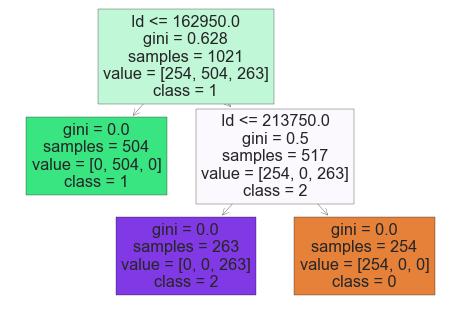

In [31]:
tree.plot_tree(arbol,feature_names=datos.columns,
               class_names=['0','1','2'],filled=True )

In [32]:
X_test

,SalePrice,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,YearBuilt,OverallQual
33,165500,447,2,6,1,1700,1700,1398,1959,5
1006,163500,484,2,7,2,1657,1657,1657,1970,6
460,263435,552,2,8,2,1935,832,832,2009,8
1002,232000,824,3,7,2,1574,1574,1574,2006,8
1445,129000,240,1,6,1,913,913,814,1966,6
...,...,...,...,...,...,...,...,...,...,...
616,183200,393,2,7,2,1509,807,783,2002,6
250,76500,0,0,6,1,1306,1306,728,1940,3
1259,151000,460,2,6,1,1054,1054,1054,1969,6
1190,168000,1356,4,7,1,1622,1622,1249,1961,4


4) Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para 
clasificar.

5) Haga  un  análisis  de  la  eficiencia  del  algoritmo  usando  una  matriz  de  confusión.  Tenga  en 
cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la 
importancia que tienen los errores.

In [33]:
print("Matriz de confusion", confusion_matrix(y_test, y_pred))
print("Acuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

Matriz de confusion [[104   0   9]
 [  6 213   5]
 [  5   5  91]]
Acuracy: 0.9315068493150684
Precision: 0.9328470844800465
Recall: 0.9315068493150684


6) Analice el modelo. Explique si hay sobreajuste (overfitting) o no.

7) Haga  un  modelo  usando  validación  cruzada,  compare  los  resultados  de  este  con  los  del 
modelo anterior. ¿Cuál funcionó mejor?

8) Compare la eficiencia del algoritmo con el resultado obtenido con el árbol de decisión (el 
de clasificación). ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?